In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time

In [2]:
n_walkers = 40
n_hopsperwalker = 30_000

n_samples = n_walkers * n_hopsperwalker
n_removed = int(4000)
n_used = n_samples-n_removed*n_walkers

hop_size = 2                                    # set it in order to get alpha of about 0.5

#random.seed(10)

In [3]:
run -i Skeleton.py 

In [4]:
list_alpha = [0.40, 0.45, 0.50, 0.55, 0.60]
#list_alpha = [0.45]
tic = time()
for i in list_alpha:
    pdfparameters = [i]
    functionparameters = [i]
    dist, accept_ratio, r_rp, rp_r = mcmc_sample(hops=n_samples, pdf = psi2_Harmonic, pdfparam=pdfparameters)
    integral, variance= integrate(pdff=psi2_Harmonic, func=E_L_Harmonic, param=pdfparameters, funcparam=functionparameters, dist_=dist)
    strin = "alpha: " + str(i) + "; integral: " + str((integral)) + " $\pm$ " + str(variance) + "; accepted/total = " + str(accept_ratio)
    print(strin)
toc = time()
print("Simulation time in seconds", toc-tic)

alpha: 0.4; integral: 0.5124557801292836 $\pm$ 0.025398841209838676; accepted/total = 0.5529225
alpha: 0.45; integral: 0.5027382367483441 $\pm$ 0.005551918273396426; accepted/total = 0.5325666666666666
alpha: 0.5; integral: 0.5 $\pm$ 0.0; accepted/total = 0.51411
alpha: 0.55; integral: 0.5020870900964173 $\pm$ 0.004702131330402277; accepted/total = 0.4968875
alpha: 0.6; integral: 0.5084676584389642 $\pm$ 0.01686002322342374; accepted/total = 0.48091833333333334
Simulation time in seconds 35.75715732574463


plot ready


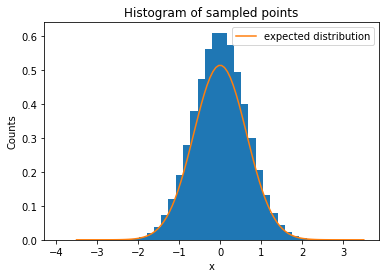

In [5]:
plot_dist(dist, 40, psi2_Harmonic, pdfparameters[0])

#step = np.arange(1,len(dist)+1)
#plt.plot(step, dist)
#plt.ylabel("x")
#plt.xlabel("hop number")
#plt.title("path of walkers")
#plt.show()

In [6]:
trimmed_dist = burn_in(dist, n_removed)
trimmed_dist.shape

(1040000,)

plot ready


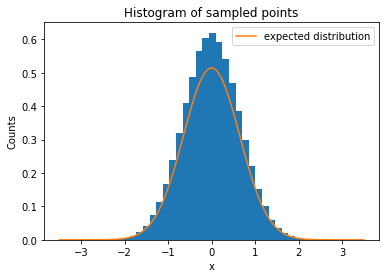

In [7]:
plot_dist(trimmed_dist, 40, psi2_Harmonic, pdfparameters[0])